In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

# The purpose of this notebook is to varify reduced SVM. See benchmark session of https://www.overleaf.com/project/5fd197ca13a41fea4be0760c

In [2]:
from classifiers.convex.svm import BinarySVM
from classifiers.datasets.dataloader import Toy2DLinearLoader, Sklearn_DataLoader, Toy2DXORLoader, ToyBlochSphereLoader
from classifiers.datasets.datascaler import DataMultiScaler, DataScaler
from classifiers.kernel import Kernel
from classifiers.visualization import Plot_SVM, Plot_Data, Plot_Log_From_SPSA
from sklearn.datasets import load_breast_cancer, make_circles, make_moons
import numpy as np 
from matplotlib import pyplot as plt 


# Reduced vs normal along k

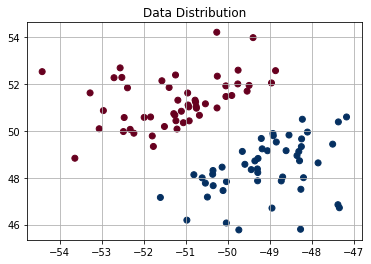

In [3]:
np.random.seed(10)
dl = Toy2DLinearLoader(w=(1, -1), b=100)
X, y = dl(num_data=100, noise=0)
#X, y = make_moons(100, noise=0.1)
ds = DataScaler('standard', with_std=False)
Plot_Data(X, y).plot()

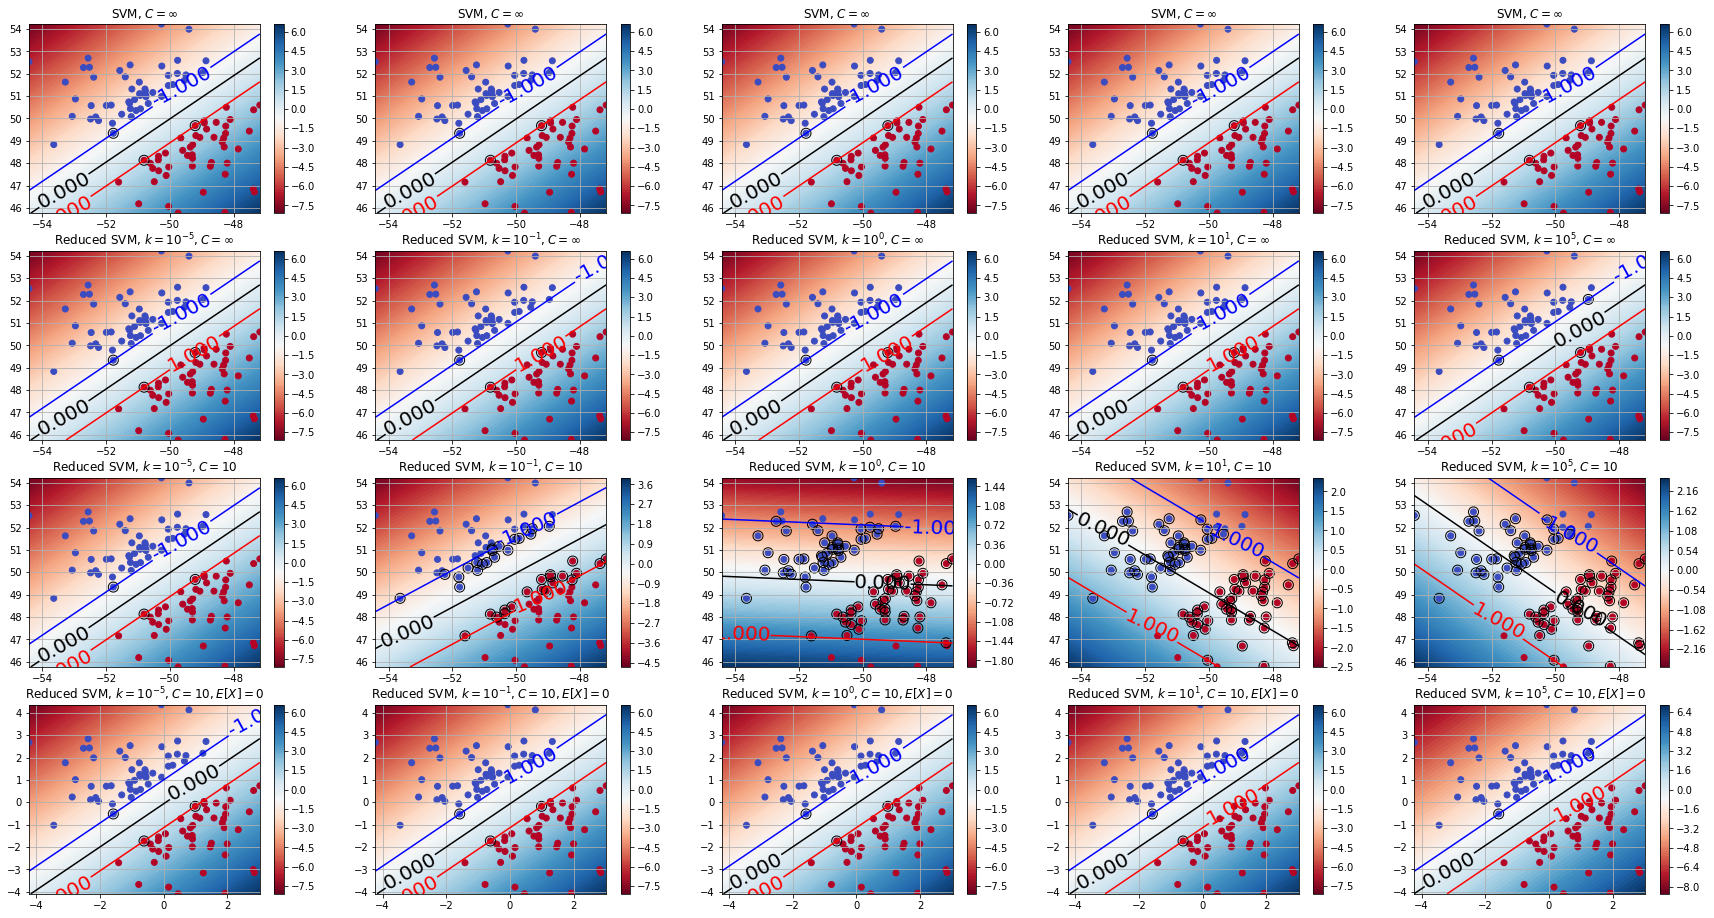

In [4]:
fig, axes = plt.subplots(4, 5, figsize=(30, 16))
k_vals = [1e-5, 1e-1, 1e0, 1e1, 1e5]
for k, ax in zip(k_vals, axes[0,:]):
    svm = BinarySVM(Kernel('linear'), C=None, k=k, mutation='SVM')
    svm.fit(X, y)
    Plot_SVM(svm).plot_boundary(ax=ax,plot_data=True,fig=fig, color_setting={-1:'b', 0:'k', 1:'r'})
    ax.set_title('SVM, $C=\infty$')
for k, ax in zip(k_vals, axes[1,:]):
    svm = BinarySVM(Kernel('linear'), C=None, k=k, mutation='REDUCED_SVM')
    svm.fit(X, y)
    Plot_SVM(svm).plot_boundary(ax=ax,plot_data=True,fig=fig, color_setting={-1:'b', 0:'k', 1:'r'})
    ax.set_title('Reduced SVM, $k=10^{'+str(int(np.log10(k)))+'}, C=\infty$')
for k, ax in zip(k_vals, axes[2,:]):
    svm = BinarySVM(Kernel('linear'), C=10, k=k, mutation='REDUCED_SVM')
    svm.fit(X, y)
    Plot_SVM(svm).plot_boundary(ax=ax,plot_data=True,fig=fig, color_setting={-1:'b', 0:'k', 1:'r'})
    ax.set_title('Reduced SVM, $k=10^{'+str(int(np.log10(k)))+'}, C=10$')
for k, ax in zip(k_vals, axes[3,:]):
    svm = BinarySVM(Kernel('linear'), C=10, k=k, mutation='REDUCED_SVM')
    svm.fit(ds(X), y)
    Plot_SVM(svm).plot_boundary(ax=ax,plot_data=True,fig=fig, color_setting={-1:'b', 0:'k', 1:'r'})
    ax.set_title('Reduced SVM, $k=10^{'+str(int(np.log10(k)))+'}, C=10, E[X]=0$')
plt.savefig('./figs/svm_vs_reduced_svm.png')

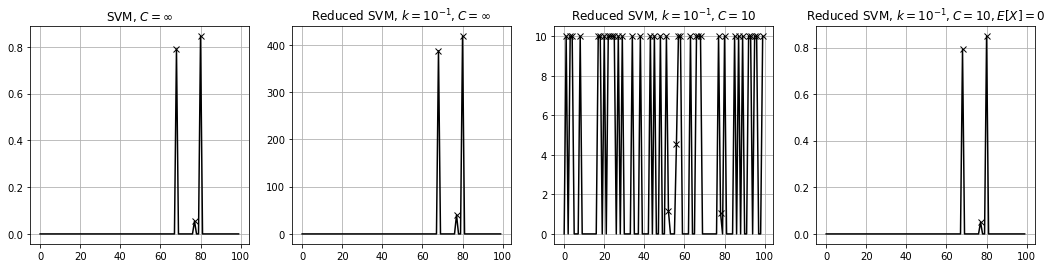

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4))
svm = BinarySVM(Kernel('linear'), C=None, mutation='SVM')
svm.fit(X, y)
Plot_SVM(svm).plot('alpha', ax=axes[0])
axes[0].set_title('SVM, $C=\infty$')
svm = BinarySVM(Kernel('linear'), C=None, k=0.1, mutation='REDUCED_SVM')
svm.fit(X, y)
Plot_SVM(svm).plot('alpha', ax=axes[1])
axes[1].set_title('Reduced SVM, $k=10^{-1}, C=\infty$')
svm = BinarySVM(Kernel('linear'), C=10, k=0.1, mutation='REDUCED_SVM')
svm.fit(X, y)
Plot_SVM(svm).plot('alpha', ax=axes[2])
axes[2].set_title('Reduced SVM, $k=10^{-1}, C=10$')
svm = BinarySVM(Kernel('linear'), C=10, k=0.1, mutation='REDUCED_SVM')
svm.fit(ds(X), y)
Plot_SVM(svm).plot('alpha', ax=axes[3])
axes[3].set_title('Reduced SVM, $k=10^{-1}, C=10, E[X]=0$')
plt.savefig('./figs/svm_vs_reduced_svm__alpha.png')